# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>PABLO GÁLVEZ ORTIGOSA</mark>

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='blue'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='blue'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 58 60 60 60 60 60 60 59 60 60 59 60 60 60 59 60 60 60 60 60 59 60 59 56 48 60 60 57 60 59 53 60 60 60 49 56 60 53 60 60 60 60 51 60 60 59 60 60 60 60 59 60 58 59 60 59 60 59 50 60 60 60 60 60 59 60 60 60 59 60 59 60 60 60 59 44 60 60 59 60 60 60 59 60 60 60 59 59 50 60 58 59 50 60 60 59 60 60 59 60 60 60 60 60 60 60 60 60 59 59 60 59 41 45 60 60 60 52 60 60 60 60 60 60 60 60 60 58 60 60 59 56 60 60 60 60 60 60 60 60 58 60 60 60 60 57 60 60 60 60 50 60 60 60 60 60 60 60 59 60 59 60 60 60 59 60 60 60 60 60 60 60 58 59 60 60 60 60 60 53 60 60 59 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 

Comprobamos que estamos ante un problema bastante balanceado. La clase que menos ejemplos tiene es 44, mientras que la que más 60. La gran mayoría de las clases tienen 60 imágenes.

In [ ]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/182.Yellow_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/001.Black_footed_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/003.Sooty_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/054.Blue_Grosbeak'), Path('/root/.fastai/data/CUB_200_2011/train/044.Frigatebird'), Path('/root/.fastai/data/CUB_200_2011/train/191.Red_headed_Woodpecker'), Path('/root/.fastai/data/CUB_200_2011/train/156.White_eyed_Vireo'), Path('/root/.fastai/data/CUB_200_2011/train/192.Downy_Woodpecker'), Path('/root/.fastai/data/CUB_200_2011/train/090.Red_breasted_Merganser'), Path('/root/.fastai/data/CUB_200_2011/train/157.Yellow_throated_Vireo'), Path('/root/.fastai/data/CUB_200_2011/train/104.American_Pipit'), Path('/root/.fastai/data/CUB_200_2011/train/074.Florida_Jay'), Path('/root/.fastai/data/CUB_200_2011/train/196.House_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train

In [ ]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


Creamos el DataBlcok. En este caso, a diferencia del ejercicio anterior, estamos ante un problema de clasificación.

Normalizaremos los datos para facilitar el entrenamiento del modelo. Utilizaremos como tamaño de batch 32, que es uno de los valores más usuales, y además nos ha dado buenos resultados en el resto de ejercicios.

Algo que debemos tener en cuenta es que en este caso las imágenes tienen distintas dimensiones. Podemos comprobarlo viendo las primeras 15 imágenes:

In [ ]:
from PIL import Image
from pathlib import Path

# Cargar la imagen y obtener su tamaño
for i in range(15):
  with Image.open(files_train[i]) as img:
      width, height = img.size
      print(f"Image: {files_train[i].name} - Width: {width}, Height: {height}")

Image: Yellow_Warbler_0100_176733.jpg - Width: 500, Height: 333
Image: Yellow_Warbler_0094_176365.jpg - Width: 500, Height: 375
Image: Yellow_Warbler_0013_176437.jpg - Width: 500, Height: 333
Image: Yellow_Warbler_0025_176189.jpg - Width: 500, Height: 399
Image: Yellow_Warbler_0095_176202.jpg - Width: 500, Height: 357
Image: Yellow_Warbler_0049_176526.jpg - Width: 490, Height: 500
Image: Yellow_Warbler_0090_176366.jpg - Width: 500, Height: 339
Image: Yellow_Warbler_0039_176444.jpg - Width: 500, Height: 375
Image: Yellow_Warbler_0046_176212.jpg - Width: 500, Height: 326
Image: Yellow_Warbler_0121_176402.jpg - Width: 500, Height: 382
Image: Yellow_Warbler_0102_176821.jpg - Width: 500, Height: 333
Image: Yellow_Warbler_0069_176346.jpg - Width: 313, Height: 500
Image: Yellow_Warbler_0096_176586.jpg - Width: 500, Height: 481
Image: Yellow_Warbler_0004_176947.jpg - Width: 500, Height: 375
Image: Yellow_Warbler_0007_176616.jpg - Width: 500, Height: 386


Como vamos a utilizar ResNet18 que requiere imágenes en la entrada de 224x224, podemos escalar directamente todas las imágenes a estas dimensiones:

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


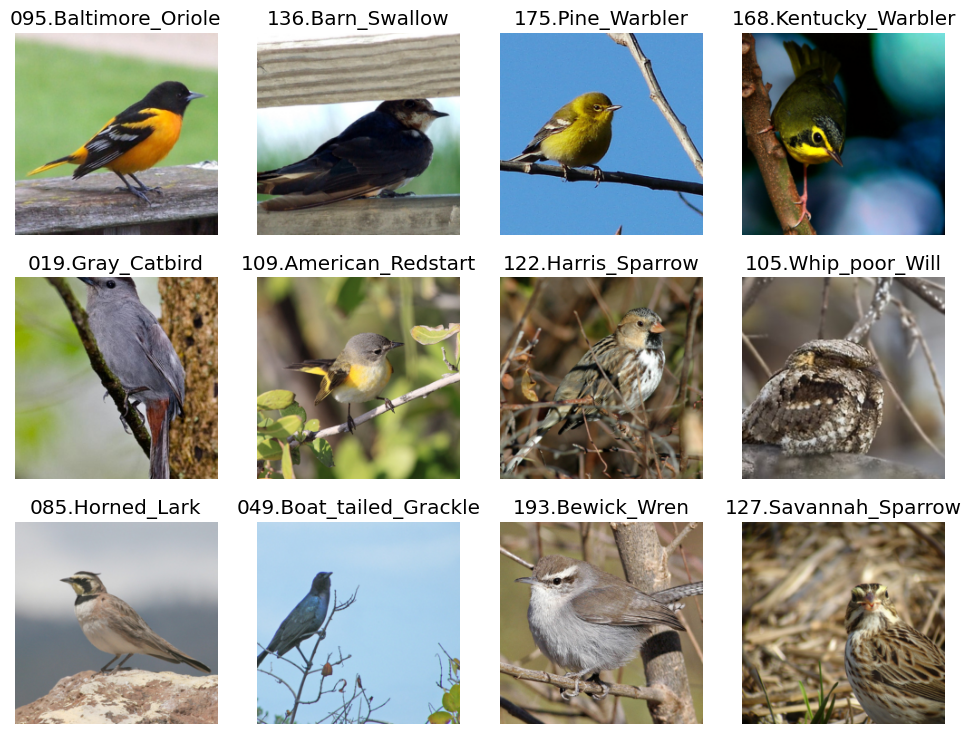

In [ ]:
CUB_200_2011 = DataBlock(blocks = (ImageBlock, CategoryBlock),  # Imagen y valor (continuo)
                  get_items = get_image_files,                  # Recuperamos las imágenes con la función get_image_files
                  get_y = parent_label,                         # Labels = Directorios en los que se encuentra cada imagen
                  item_tfms=Resize(224),                        # Dimensiones entrada --> 224x224
                  batch_tfms = Normalize(),                     # Normalizamos los datos para facilitar el entrenamiento
                  splitter  = RandomSplitter (valid_pct=0.1, seed=42),) #Utilizamos un 10% de los datos para validación

dls = CUB_200_2011.dataloaders(path/'train', bs=32)

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

Importamos ResNet18:

In [ ]:
from torchsummary import summary
model = fastai.vision.models.resnet18()

summary(model.cuda(), (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

Queremos incorporar como cabecera una única capa FC. fastai elimina automáticamente la última capa de average pooling y la capa FC, por lo que si queremos añadir una única capa FC deberá ser de $512\cdot7\cdot7$ entradas (tras un Flattening) y deberá tener tantas salidas como clases tengamos en nuestro problema (200). Nótese que no será necesario incorporar en la última capa SoftMax, ya que lo incopora automáticamente fastai en CrossEntropyLossFlat.

(OBSERVACIÓN: lo concluido en el ejercicio 3, nos llevaría a pensar que entrenar únicamente la cabecera tendría resultados bastante buenos, ya que ImageNet es bastante similar a este conjunto de datos. Además, por tener una cantidad de datos no muy grande (< 10000) sería recomendable incorporar algo de regularización al fine-tuning, ya que lo más probable es que tengamos bastante sobreaprendizaje).

In [ ]:
model = fastai.vision.models.resnet18

# Cabecera: capa FC 512*7*7 --> 200
# Aplanamos la imagen de 512x7x7
# Capa FC de 512 * 7 * 7 = 25088 entrada y 200 salidas
custom_head = nn.Sequential(nn.Flatten(), nn.Linear(25088, 200))

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = True, se congelan todos los pesos de ResNet salvo los de BN
# train_bn = False, se congelan los pesos de BN
# custom_head, la cabecera será la definida por nosotros
learn = vision_learner(dls,
                       model,
                       pretrained = True,
                       train_bn = False,
                       custom_head = custom_head,
                       metrics=[accuracy, F1Score(average='weighted')], loss_func= CrossEntropyLossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn.summary()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 208MB/s]


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

Observamos que la cabecera aporta a la red unos 5 millones de parámetros. Procedemos a realizar el fine-tuning.

Utilizaremos el learning rate discriminativo, con los paráemtros por defecto de fastai, que en la mayoría de problemas proporciona buenos resultados.

Además, utilizaremos los parámetros por defecto de fastai, es decir, durante 1 época, entrenaremos únicamente la cabecera, y en las siguientes entrenaremos toda la red partiendo de los pesos aprendidos en ImageNet. El objetivo sería que tras esa época, se obtuviera un modelo que no funcionara excesivamente mal, por lo que entrenaremos,  comprobaremos si efectivamente ocurre.

In [ ]:
freeze_epochs = 1
learn.fine_tune(10 - freeze_epochs)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,29.824726,33.945862,0.191987,0.170609,00:51


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,4.961878,11.629152,0.397329,0.375493,00:58
1,5.516520,20.443142,0.348915,0.327998,00:41
2,7.287736,20.792587,0.368948,0.356815,00:45
3,5.200874,21.048315,0.398998,0.387478,00:42
4,2.860650,17.657001,0.470785,0.460205,00:44
5,1.389457,15.151364,0.505843,0.491291,00:42


No improvement since epoch 0: early stopping


En este ejercicio, parece que no incorporar la capa de Pooling adaptativo provoca un rendimiento bastante peor, debido al excesivo incremento en el número de parámetros (siendo ResNet18 una red no tan grande), lo que sumado a la cantidad tan reducida de imágenes, provoca demasiado sobreajuste, por lo que en este ejercicio sí incorporaremos la capa de Pooling (que eliminaba fastai) a la cabecera:

In [ ]:
custom_head = nn.Sequential(nn.AdaptiveAvgPool2d(output_size=(1,1)),nn.Flatten(), nn.Linear(512, 200))

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = True, se congelan todos los pesos de ResNet salvo los de BN
# train_bn = False, se congelan los pesos de BN
# custom_head, la cabecera será la definida por nosotros
learn3 = vision_learner(dls,
                       model,
                       pretrained = True,
                       train_bn = False,
                       custom_head = custom_head,
                       metrics=[accuracy, F1Score(average='weighted')], loss_func= CrossEntropyLossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn3.fine_tune(9)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,4.750103,3.977593,0.131886,0.105936,00:38


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,2.583652,2.407836,0.420701,0.391771,00:41
1,1.573705,1.678243,0.550918,0.539930,00:43
2,0.853923,1.451781,0.604341,0.590600,00:40
3,0.358497,1.348098,0.644407,0.637011,00:41
4,0.126770,1.311395,0.644407,0.637322,00:42
5,0.060795,1.249733,0.659432,0.654517,00:47
6,0.029916,1.251117,0.669449,0.671422,00:40
7,0.020724,1.202334,0.671119,0.671007,00:43
8,0.017546,1.202300,0.666110,0.668495,00:40


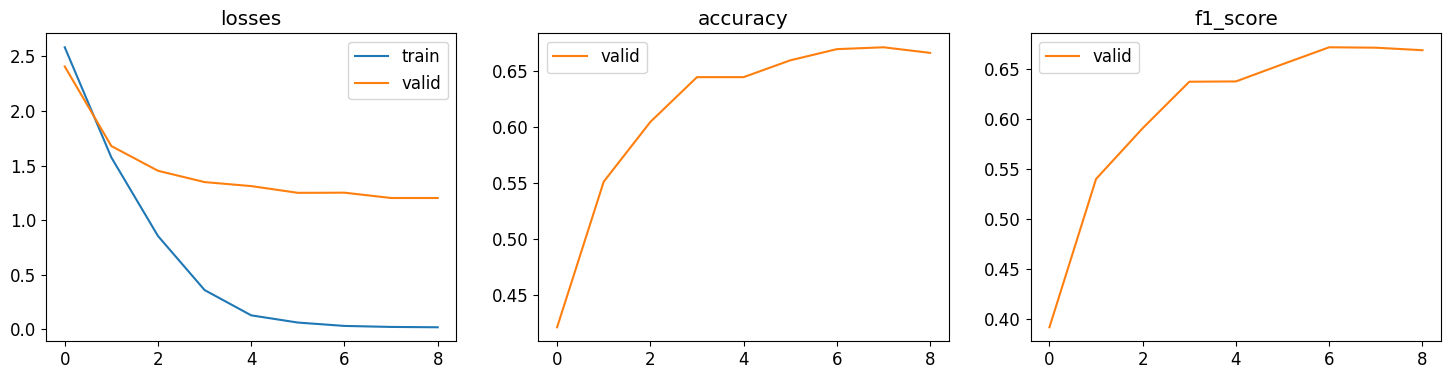

In [ ]:
learn3.recorder.plot_metrics()

El sobreaprendizaje sigue siendo notable, pero ahora sí podemos observar una convergencia clara.

En entrenamiento, la red se ajusta perfectamente a los datos del entrenamiento, obteniendo un error prácticamente 0.

En validación, se obtiene un accuracy cercano al $67\%$, que para ser un dataset con 200 clases, parece ser un resultado bastante bueno. En cuanto al f1-score, los valores obtenidos son muy similares a los de accuracy en todas las épocas, mostrando, como ya sabíamos, que los datos están bastante bien balanceados.

Podemos, por último, verificar el rendimiento del modelo en test:

In [ ]:
dls_test = learn3.dls.test_dl(files_test, with_labels = True)

preds, targs, _ = learn3.get_preds(dl = dls_test, with_decoded = True)
test_accuracy = accuracy(preds, targs)
print(f'Accuracy en test = {test_accuracy.item()}')

Accuracy en test = 0.6912323236465454


, por lo que el accuracy en test del modelo es ligeramente mayor que en validación, aproximadamente un $70\%$.

## <font color='blue'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='blue'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='blue'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='blue'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=ecfb93e89ebff51270f11928217f814396dcc33a3118dd70f92d004450a6ad74
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


## 3.1 - Cómo funciona GradCAM

Basándonos en [[1]](https://arxiv.org/pdf/1610.02391.pdf):

El objetivo de GradCAM será, para un modelo CNN, determinar qué partes de la imagen de entrada han contribuido más en la predicción realizada por la red.
Para ello, se sigue el proceso detallado a continuación.

Primeramente, fijamos una capa convolucional de la red. Supongamos que dicha capa convolucional tiene $K$ filtros. Por tanto, producirá $K$ mapas de características, y denotaremos cada uno de ellos como $A^k$. Estos mapas de características tendrán una anchura $u$ y una altura $v$.

Fijados estos conceptos, introducimos como entrada de nuestro modelo una imagen que queremos analizar. Como estamos ante un problema de clasificación, nuestro modelo producirá en la última capa (antes de aplicar softmax) tantas salidas como clases tengamos, y la predicción final será el valor más elevado. A ese valor más elevado, que es de alguna forma una puntuación ("score") de la clase $c$, la llamaremos $y_c$.

Nuestro objetivo será estimar ahora cómo influye cada mapa de características $A^k$ en $y_c$. Calculamos, por tanto, la derivada de $y_c$ respecto a cada posición del mapa de características $A^k$ (es decir, cómo influye un cambio en cada posición de $A^k$ en el valor de $y_c$) y calculamos, para cada $k$ el valor medio de estos valores:

$$
\alpha_k^c = \frac{1}{u\cdot v} \sum_i\sum_j {\frac{\partial{y_c}}{\partial{A_{ij}^k}}}
$$

,obteniendo así una medida, para cada $k$, de la importancia del mapa $A^k$ en la decisión de la clase $c$.

La forma de calcular estos gradientes es similar al proceso de *backpropagation* realizado en el descenso de gradiente. La diferencia radica es que, en este caso, en lugar de propagar la contribución de cada peso a la loss, en este caso, se propaga la contribución de cada $A_{ij}^k$ a $y_c$.




Finalmente, para calcular un mapa de calor, realizaremos una suma ponderada de los distintos mapas de características con pesos iguales a $\alpha_k^c$. Como únicamente queremos las contribuciones positivas (es decir, no queremos representar qué zonas no han contribuido a que la elección de clase sea $c$), aplicaremos a la suma la función ReLU, que asigna 0 a todos los valores negativos:

$$
H_{\text{Grad-CAM}}^c = ReLU \left(\sum_k{\alpha_k^c A^k}\right)
$$

Este mapa de calor deberá ser normalizado para visualizarse. Además, obsérvese que cada $A^k$ tendrá, en general, dimensiones bastante más pequeñas que las de la imagen original (la capa convolucional puede estar tras haber realizado pooling o convolución sin padding varias veces).

Por tanto, para visualizar $H_{\text{Grad-CAM}}^c$ superpuesto con la imagen, se deberá realizar, usando interpolación, un *upsampling* de dicho mapa de calor, pudiendo así observar qué partes de la imagen original son las más importantes (las partes que se coloreen de colores más cálidos, como el rojo, tendrán una mayor importancia en la decisión).

## 3.2 - ¿Para qué sirve GradCAM?

GradCAM intenta responder a la pregunta "por qué una CNN predice lo que predice" intentando determinar qué partes de la imagen original llevan a que la red haga tal predicción.

En general, siempre ha existido un cierto equilibrio entre precisión y interpretabilidad. Aunque los primeros modelos, muy simples, eran bastante interpretables, los resultados que obtenían no eran buenos. A medida que fueron creándose modelos más profundos, como las CNN, se comenzó a sacrificar la interpretabilidad para obtener mejores resultados.

Actualmente, la necesidad de explicabilidad comienza a crecer más y más, ya que las CNN están comenzando a tener resultados superiores a los seres humanos en muchas aplicaciones. Es además especialmente necesario conocer el motivo de una predicción, cuando estos modelos se utilizan en campos como la medicina, donde la mayoría de decisiones tienen mucho riesgo.

GradCAM nos permite evaluar el funcionamiento de nuestra red en tareas de clasificación. Los principales usos de GradCAM son:
- Por una parte, nos permite comprender los fallos del modelo (algo que en el ejercicio 1 no podíamos entender), mostrando las zonas de la imagen que llevan a dicha predicción errónea (y que, en general, sí se va a parecer a la clase con la que se confunde).
- Nos permite identificar ciertos sesgos de nuestro modelo. En el paper de referencia, se pone un ejemplo de un dataset en el que gran parte de los médicos eran hombres, mientras que casi todas las enfermeras eran mujeres. Con GradCAM se pudo comprobar que el modelo únicamente miraba a la cara de la persona para identificar si era hombre o mujer, y en base a eso realizar la predicción (en lugar de fijarse en el atuendo, o en si llevaba un fonendoscopio o similar). Otro ejemplo bastante conocido es el dataset orientado a detectar tanques; en el que todos los tanques estaban en zonas desérticas, mientras que todas las imágenes sin tanques eran zonas de prados verdes. Se podría comprobar con GradCAM que el modelo únicamente se fijaba en el fondo de la imagen para realizar la predicción.



## 3.3 - Aplicación de GradCAM a nuestro dataset

Seleccionamos 6 imágenes aleatorias del test:

In [ ]:
from random import randint

# Semilla para la generación de números aleatorios para reproducibilidad
random.seed(42)

# Seleccionar 6 imágenes aleatorias del DataLoader
num_images_to_process = 6
selected_inputs = []
selected_labels = []
files_test_gradcam = random.sample(files_test, num_images_to_process)

# Creamos un DataLoader solo con esas 6 imágenes y obtenemos las predicciones del modelo
dls_test_gradcam = learn3.dls.test_dl(files_test_gradcam, with_labels = True)
preds, targs, _ = learn3.get_preds(dl = dls_test_gradcam, with_decoded = True)

print("Seleccionadas imágenes:")
print(files_test_gradcam)

# Creamos un vector con las imágenes seleccionadas
for inputs, labels in dls_test_gradcam:
    for i in range(len(inputs)):
        selected_inputs.append(inputs[i])
        selected_labels.append(labels[i])

Seleccionadas imágenes:
[Path('/root/.fastai/data/CUB_200_2011/test/007.Parakeet_Auklet/Parakeet_Auklet_0075_795981.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/039.Least_Flycatcher/Least_Flycatcher_0045_30174.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/156.White_eyed_Vireo/White_Eyed_Vireo_0114_159206.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/050.Eared_Grebe/Eared_Grebe_0082_34227.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/109.American_Redstart/American_Redstart_0026_103729.jpg'), Path('/root/.fastai/data/CUB_200_2011/test/053.Western_Grebe/Western_Grebe_0013_36383.jpg')]


Como hemos explicado, GradCAM actúa tras alguna capa convolucional de la red. En cuanto a qué capa elegir, los autores en [[2]](https://github.com/jacobgil/pytorch-grad-cam) recomiendan, tanto para resnet18 como resnet50 elegir `layer4[-1]`, es decir, el último bloque convolucional anterior a la cabecera:

In [ ]:
from torchvision.models import resnet18
model_aux = resnet18(pretrained=True)
model_aux.layer4[-1]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Podemos acceder a dicho bloque convolucional de nuestro modelo de la siguiente forma:

In [ ]:
# Primer 0: parte anterior a la cabecera
# Primer -1: último bloque de la parte anterior a la cabecera
# Segundo -1: última capa del último bloque de la parte anterior a la cabecera
learn3.model[0][-1][1]

BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Aplicamos GradCAM a las 6 imágenes seleccionadas, adaptando el código propuesto en [[2]](https://github.com/jacobgil/pytorch-grad-cam):

Clase predicha: 006.Least_Auklet / Clase objetivo: 006.Least_Auklet
Clase predicha: 038.Great_Crested_Flycatcher / Clase objetivo: 038.Great_Crested_Flycatcher
Clase predicha: 153.Philadelphia_Vireo / Clase objetivo: 155.Warbling_Vireo
Clase predicha: 049.Boat_tailed_Grackle / Clase objetivo: 049.Boat_tailed_Grackle
Clase predicha: 108.White_necked_Raven / Clase objetivo: 108.White_necked_Raven
Clase predicha: 052.Pied_billed_Grebe / Clase objetivo: 052.Pied_billed_Grebe


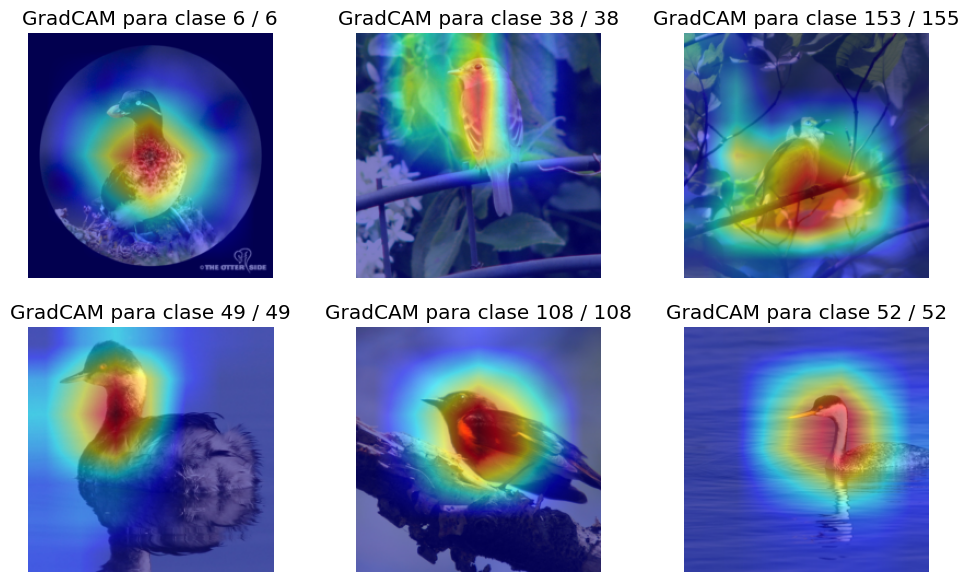

In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layers = [learn3.model[0][-1][1]]

# Crear el tensor 4D de entrada con las 6 imágenes
input_tensor = torch.stack(selected_inputs)  # (6, C, H, W)
aux = 1
plt.figure(figsize=(12, 7))

predicted_classes = [torch.argmax(pred).item() for pred in preds]

# Crear los objetivos para Grad-CAM
targets = [ClassifierOutputTarget(cls) for cls in predicted_classes]

# Crear objeto Grad-CAM
with GradCAM(model=learn3.model, target_layers=target_layers) as cam:
    # Calcular Grad-CAM para las 6 imágenes seleccionadas
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)

    # Visualizar cada imagen con su Grad-CAM
    for idx, grayscale_cam in enumerate(grayscale_cams):
        # Convertir la imagen al formato RGB (0 a 1) para visualizar
        img_tensor = input_tensor[idx].permute(1, 2, 0).cpu().numpy()  # (H, W, C)
        rgb_img = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())  # Normalizar a [0, 1]

        # Generar la visualización Grad-CAM
        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

        # Mostrar la visualización
        ax1 = plt.subplot(2, 3, aux)
        ax1.imshow(visualization)
        ax1.set_title(f"GradCAM para clase {predicted_classes[idx]} / {targs[idx].item()}")
        ax1.axis('off')
        aux += 1

# Mostramos el nombre de las clases predichas y objetivo (se encuentran en vocab[idx-1])
for clase_predicha, clase_objetivo in zip(predicted_classes, targs):
  print(f'Clase predicha: {dls_test_gradcam.vocab[clase_predicha-1]} / Clase objetivo: {dls_test_gradcam.vocab[clase_objetivo.item()-1]}')

,donde primero se ha mostrado qué especie de pájaro es cada clase de las que aparecen en la imagen.

En cada imagen se muestra:
> GradCAM para clase predicha por la red / Clase objetivo

En general, observamos que el modelo funciona bastante bien, ya que las zonas en las que más se fija la red para tomar la predicción son partes de los pájaros.

A pesar de ello, tanto en la segunda (clase 38) como en la tercera imagen (clase 153), el modelo toma la decisión basándose bastante en el entorno de la imagen. En la segunda, se fija en las hojas de detrás del pájaro, ignorando prácticamente casi la mitad del pájaro. En la tercera, la parte de la imagen que más determina la decisión son la rama de madera y el cielo; lo que provoca, de hecho, que el modelo falle la predicción.

En el resto de imágenes, la predicción se debe principalmente a partes del pájaro. Curiosamente, tanto en la primera imagen como en la cuarta el modelo hace la predicción fijándose principalmente en el cuello del pájaro (lo que parece indicar que puede ser un rasgo distintivo de dichas especies).

Tanto en la quinta como en la sexta imagen, el modelo toma la predicción fijándose tanto en la cabeza como en parte del cuerpo del pájaro, aunque en la sexta también parece que el agua alrededor del pájaro determina la predicción.

